## Project 1 - Yuliya Dubovichenko

## To upload the dataset

In [103]:
import pandas as pd

In [104]:
customers = pd.read_csv('customer_retail.csv')

In [105]:
customers.head()

,Education,customer_id,AGE,marital,JOB,Product Category,Quantity,Price per Unit
0,secondary,100103,33.0,married,entrepreneur,Clothing,4,500
1,tertiary,100106,35.0,married,management,Beauty,3,25
2,primary,100118,57.0,married,blue-collar,Electronics,2,25
3,primary,100119,60.0,married,retired,Clothing,3,50
4,secondary,100121,28.0,married,blue-collar,Electronics,2,500


In [106]:
print(customers.shape)

(10578, 8)


In [107]:
customers.columns

Index(['Education', 'customer_id', 'AGE', 'marital', 'JOB', 'Product Category',
       'Quantity', 'Price per Unit'],
      dtype='object')

In [108]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education         10578 non-null  object 
 1   customer_id       10578 non-null  int64  
 2   AGE               10558 non-null  float64
 3   marital           10578 non-null  object 
 4   JOB               10578 non-null  object 
 5   Product Category  10578 non-null  object 
 6   Quantity          10578 non-null  int64  
 7   Price per Unit    10578 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 661.2+ KB


In [109]:
customers.dtypes

Education            object
customer_id           int64
AGE                 float64
marital              object
JOB                  object
Product Category     object
Quantity              int64
Price per Unit        int64
dtype: object

## Data Cleaning and Preprocessing

In [110]:
missing_counts = customers.isna().sum()
print(missing_counts)

Education            0
customer_id          0
AGE                 20
marital              0
JOB                  0
Product Category     0
Quantity             0
Price per Unit       0
dtype: int64


In [111]:
customers = customers.dropna(subset=['AGE'])

In [112]:
missing_counts = customers.isna().sum()
print(missing_counts)

Education           0
customer_id         0
AGE                 0
marital             0
JOB                 0
Product Category    0
Quantity            0
Price per Unit      0
dtype: int64


In [113]:
outliers = customers[(customers['AGE'] < 18) | (customers['AGE'] > 100)]
print("Outliers:")
print(outliers)

Outliers:
      Education  customer_id    AGE  marital         JOB Product Category  \
401    tertiary       102598  146.0  married  management           Beauty   
1151  secondary       107284  139.0  married    services           Beauty   
1530  secondary       109385  144.0  married  technician           Beauty   
3489  secondary       120217  130.0  married  technician           Beauty   

      Quantity  Price per Unit  
401          1              10  
1151         1              10  
1530         1              10  
3489         2              30  


In [114]:
outlier_indices = [401, 1151, 1530, 3489]

customers_cleaned = customers.drop(outlier_indices)

In [115]:
outliers = customers_cleaned[(customers_cleaned['AGE'] < 18) | (customers_cleaned['AGE'] > 100)]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Education, customer_id, AGE, marital, JOB, Product Category, Quantity, Price per Unit]
Index: []


In [116]:
print(customers_cleaned['Education'].unique())

['secondary' 'tertiary' 'primary' 'unknown' 'SECONDARY']


In [117]:
customers_cleaned['Education'] = customers_cleaned['Education'].str.lower()

print(customers_cleaned['Education'].unique())

['secondary' 'tertiary' 'primary' 'unknown']


In [118]:
print(customers_cleaned['marital'].unique())

['married' 'single' 'divorced' 'DIVORCED']


In [119]:
customers_cleaned['marital'] = customers_cleaned['marital'].str.lower()

print(customers_cleaned['marital'].unique())

['married' 'single' 'divorced']


In [120]:
print(customers_cleaned['JOB'].unique())

['entrepreneur' 'management' 'blue-collar' 'retired' 'admin.' 'technician'
 'services' 'housemaid' 'unemployed' 'student' 'self-employed'
 'ADMINISTRATION' 'unknown']


In [121]:
replacement_values = {'unknown': 'other'}

customers_cleaned['Education'] = customers_cleaned['Education'].replace(replacement_values)
customers_cleaned['JOB'] = customers_cleaned['JOB'].replace(replacement_values)

print(customers_cleaned)

       Education  customer_id   AGE   marital           JOB Product Category  \
0      secondary       100103  33.0   married  entrepreneur         Clothing   
1       tertiary       100106  35.0   married    management           Beauty   
2        primary       100118  57.0   married   blue-collar      Electronics   
3        primary       100119  60.0   married       retired         Clothing   
4      secondary       100121  28.0   married   blue-collar      Electronics   
...          ...          ...   ...       ...           ...              ...   
10573  secondary       145305  73.0   married       retired         Clothing   
10574  secondary       145306  25.0    single    technician      Electronics   
10575   tertiary       145307  51.0   married    technician         Clothing   
10576    primary       145308  71.0  divorced       retired         Clothing   
10577  secondary       145309  72.0   married       retired      Electronics   

       Quantity  Price per Unit  
0    

In [122]:
print(customers_cleaned['Education'].unique())

['secondary' 'tertiary' 'primary' 'other']


In [123]:
print(customers_cleaned['JOB'].unique())

['entrepreneur' 'management' 'blue-collar' 'retired' 'admin.' 'technician'
 'services' 'housemaid' 'unemployed' 'student' 'self-employed'
 'ADMINISTRATION' 'other']


In [124]:
customers_cleaned['JOB'] = customers_cleaned['JOB'].replace('ADMINISTRATION', 'admin.')

print(customers_cleaned['JOB'].unique())

['entrepreneur' 'management' 'blue-collar' 'retired' 'admin.' 'technician'
 'services' 'housemaid' 'unemployed' 'student' 'self-employed' 'other']


In [125]:
print(customers_cleaned['Product Category'].unique())

['Clothing' 'Beauty' 'Electronics']


In [126]:
print(customers_cleaned['Quantity'].unique())

[4 3 2 1 5 7 8]


In [127]:
print(customers_cleaned['Price per Unit'].unique())

[500  25  50 300  30  20   5  10  35  15  70  40]


In [128]:
duplicates = customers_cleaned[customers_cleaned.duplicated()]

if duplicates.shape[0] == 0:
    print("No duplicates found in the dataset.")
else:
    print("Duplicates found in the dataset:")
    print(duplicates)

No duplicates found in the dataset.


In [129]:
customers_cleaned["Total Cost"] = customers_cleaned["Price per Unit"] * customers_cleaned["Quantity"]

## Exploratory Data Analysis

### Distribution of key numerical variables using histograms

C:\Users\14373\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\14373\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


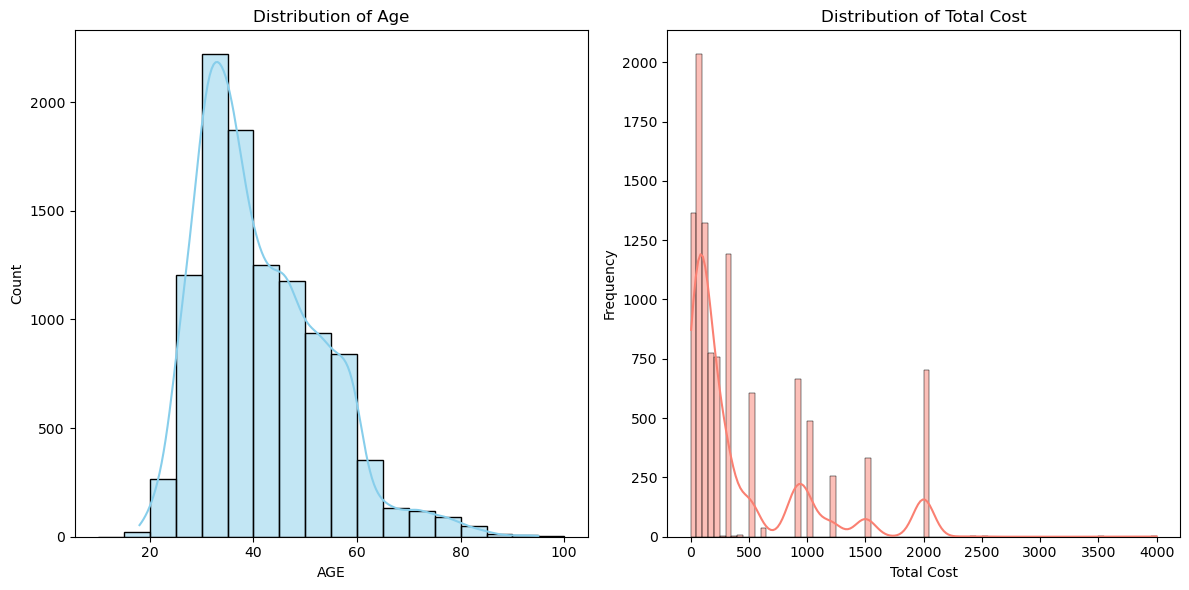

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bin_edges = list(range(10, 101, 5))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(customers_cleaned['AGE'], bins=bin_edges, kde=True, color='skyblue')
plt.title('Distribution of Age')

bin_edges = list(range(0, 4001, 50))

plt.subplot(1, 2, 2)
sns.histplot(customers_cleaned['Total Cost'], bins=bin_edges, kde=True, color='salmon')
plt.title('Distribution of Total Cost')

plt.xlabel('Total Cost')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Relationships between variables using scatter plots and correlation matrices

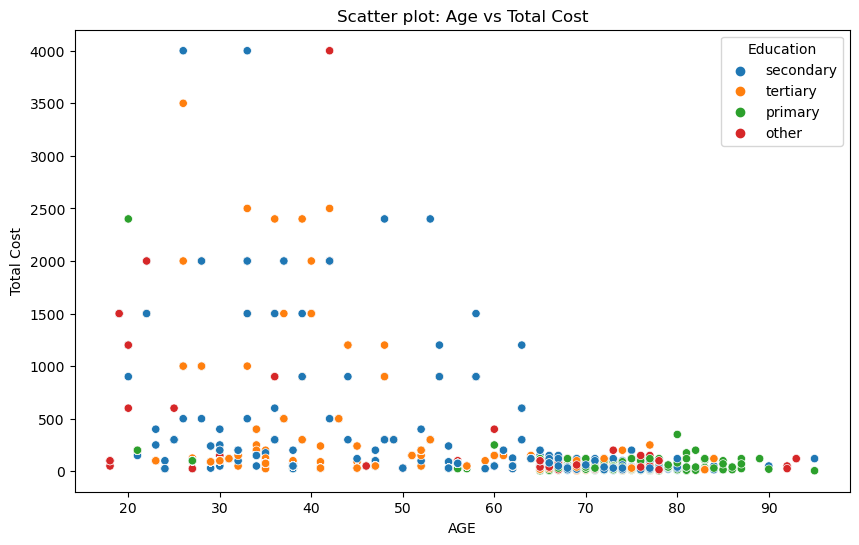

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customers_cleaned, x='AGE', y='Total Cost', hue='Education')
plt.title('Scatter plot: Age vs Total Cost')
plt.show()

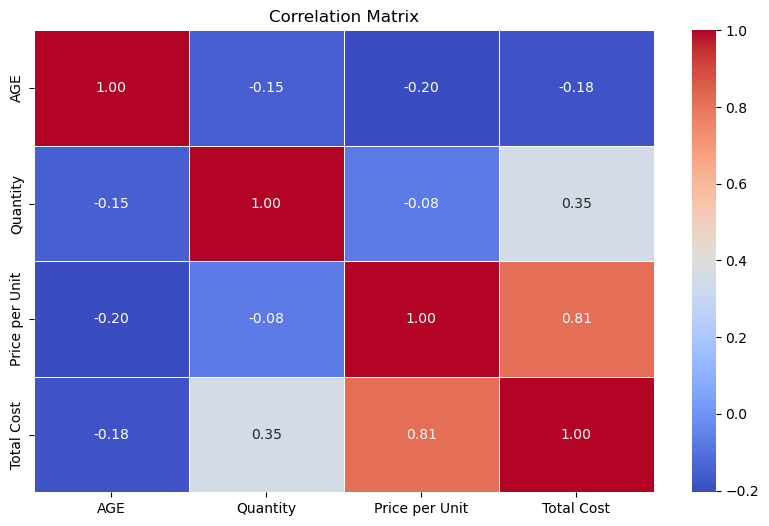

In [132]:
relevant_columns = ['AGE', 'Quantity', 'Price per Unit', 'Total Cost']

customers_relevant = customers_cleaned[relevant_columns]

correlation_matrix = customers_relevant.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Group comparisons using box plots and bar charts

Text(0.5, 1.0, 'Age Distribution by Education')

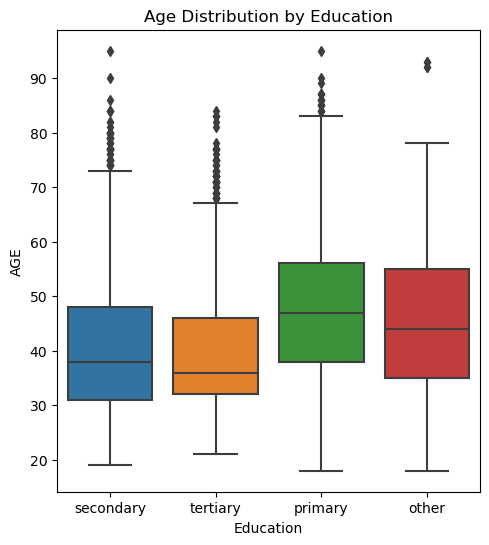

In [133]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=customers_cleaned, x='Education', y='AGE')
plt.title('Age Distribution by Education')

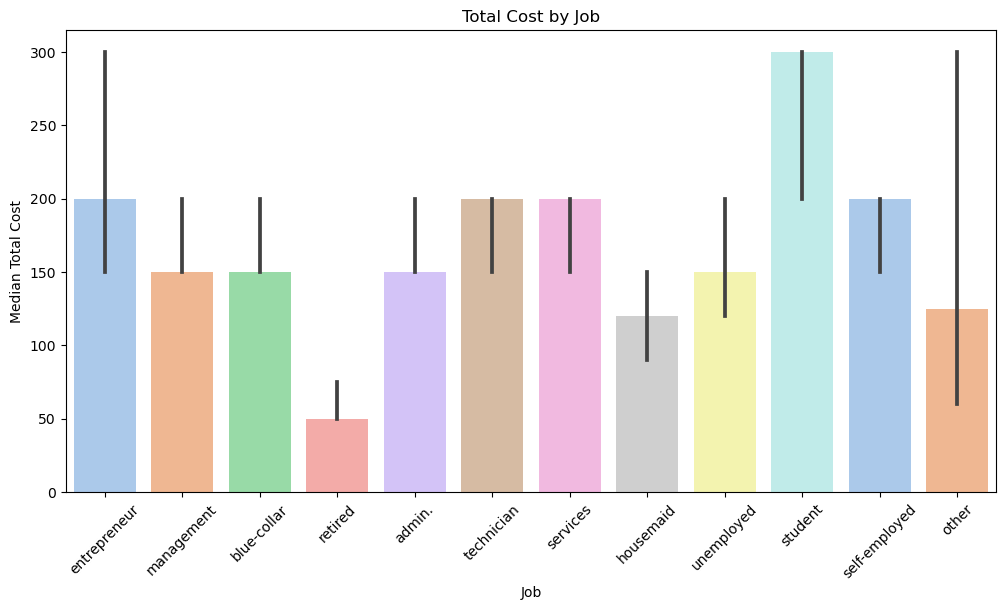

In [134]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customers_cleaned, x='JOB', y='Total Cost', estimator='median', palette='pastel')
plt.title('Total Cost by Job')
plt.xlabel('Job')
plt.ylabel('Median Total Cost')
plt.xticks(rotation=45)
plt.show()

## Statistical Inference

### Hypotheses based on the EDA findings

    Hypothesis 1 (Age Distribution):
Null Hypothesis (H0): The age distribution of customers follows a normal distribution with a mean age within the range of 25 to 40 years.

Alternative Hypothesis (H1): The age distribution of customers does not follow a normal distribution with a mean age within the range of 25 to 40 years.



    Hypothesis 2 (Total Cost by Occupation):
Null Hypothesis (H0): There is no significant difference in the median total cost among different occupations.

Alternative Hypothesis (H1): There is a significant difference in the median total cost among different occupations.

In [135]:
from scipy.stats import shapiro, kruskal

# Hypothesis 1: Age Distribution
# Shapiro-Wilk test for normality
stat, p_value = shapiro(customers_cleaned['AGE'])
print("Hypothesis 1 - Shapiro-Wilk Test:")
print("Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. Age distribution is not normal.")
else:
    print("Fail to reject the null hypothesis. Age distribution may be normal.")

Hypothesis 1 - Shapiro-Wilk Test:
Test Statistic: 0.9486258029937744
p-value: 0.0
Reject the null hypothesis. Age distribution is not normal.


C:\Users\14373\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The results of age distribution do not apply to be normal, however, mean and median of age lies between 25-40, which helps us in targeting these customers and providing opportunities to explore these customer segment further.

In [136]:
# Hypothesis 2: Total Cost by Occupation
# Kruskal-Wallis test for comparing median total cost among different occupations
occupations = customers_cleaned['JOB'].unique()
occupation_groups = [customers_cleaned[customers_cleaned['JOB'] == occupation]['Total Cost'] for occupation in occupations]

stat, p_value = kruskal(*occupation_groups)
print("\nHypothesis 2 - Kruskal-Wallis Test:")
print("Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences in median total cost among occupations.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences in median total cost among occupations.")


Hypothesis 2 - Kruskal-Wallis Test:
Test Statistic: 477.47357250724434
p-value: 2.032077707970258e-95
Reject the null hypothesis. There are significant differences in median total cost among occupations.


Differences in median costs for different occupations is further confirmed from the initial exploratory data analysis. Thus, this provides opportunity to further delve into questions such as Why students are the highest spenders? Why retired are spending the lowest? What strategies could be included to increase the spendings of the retired? and further more.

### Visualization and Presentation of Findings

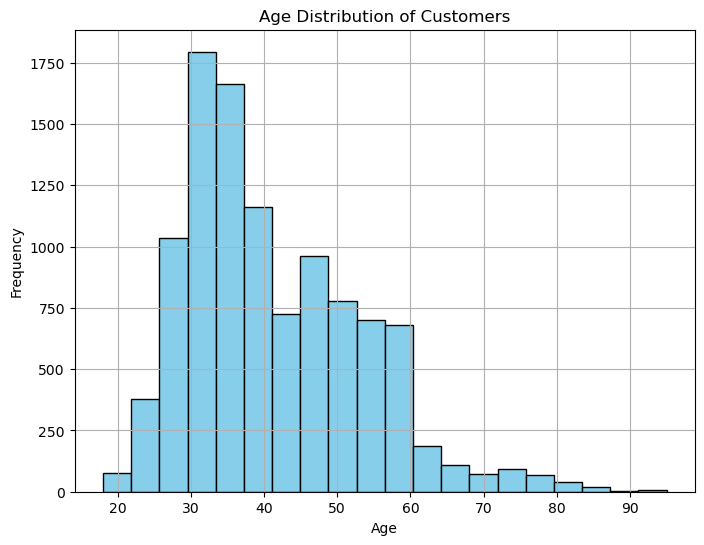

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(customers_cleaned['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

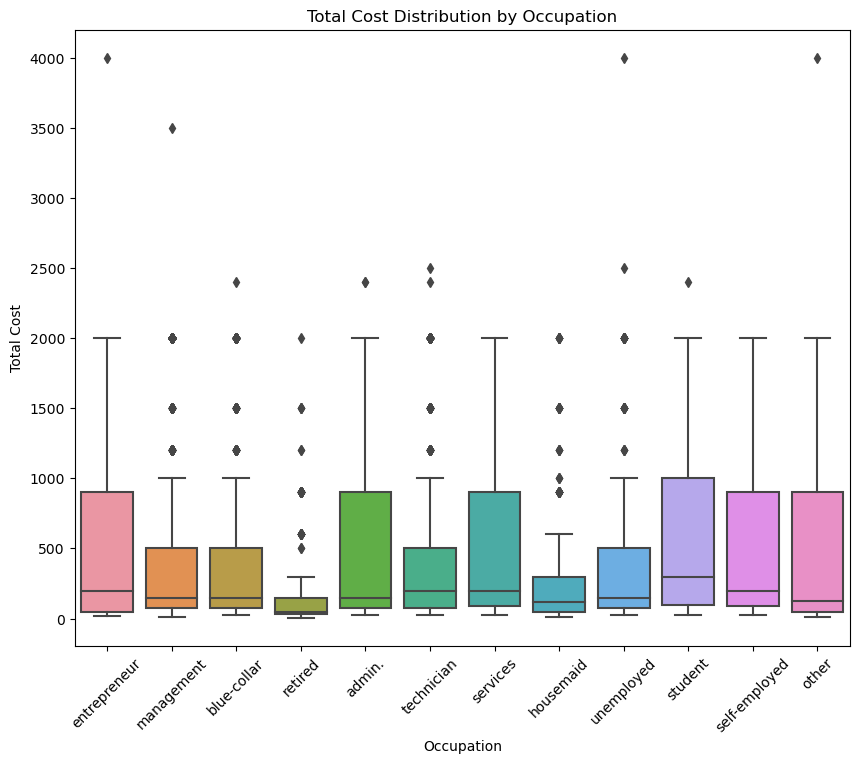

In [138]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.boxplot(x='JOB', y='Total Cost', data=customers_cleaned)
plt.title('Total Cost Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.show()

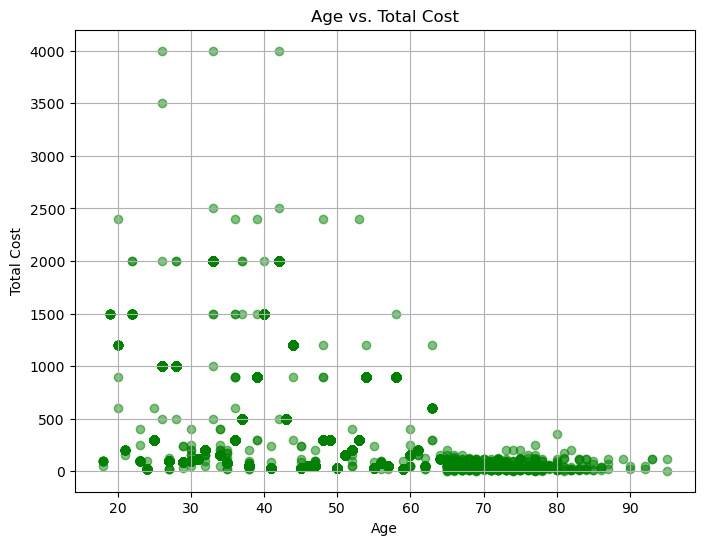

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(customers_cleaned['AGE'], customers_cleaned['Total Cost'], color='green', alpha=0.5)
plt.title('Age vs. Total Cost')
plt.xlabel('Age')
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()

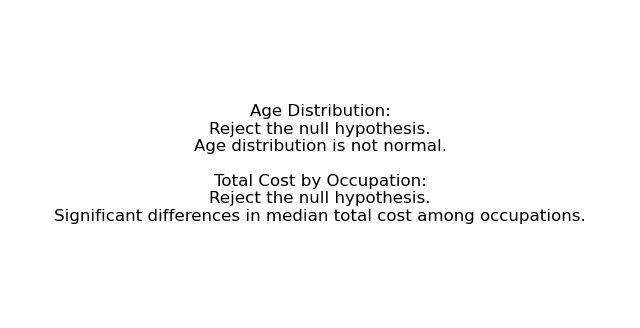

In [140]:
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, "Age Distribution:\nReject the null hypothesis.\nAge distribution is not normal.\n\nTotal Cost by Occupation:\nReject the null hypothesis.\nSignificant differences in median total cost among occupations.", ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show()